# Unsupervized Machine Learning (Clustering)

## The List of Content
    1. Importing Libraries and Data
    2. Data Wrangling
        2.1. Dropping Unnecessary Columns
    3. The Elbow Technique
    4. K-Means Clustering

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\praha\OneDrive\Documents\Python\04-2023 World University Rankings\02. Data'

In [4]:
# import data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'world_university_rankings_cleaned_wrangled.pkl'))

In [5]:
df.head()

,world_rank,institution,country,national_rank,education_quality_rank,alumni_employment_rank,Faculty_quality_rank,publications_rank,influence_rank,citations,broad_impact_rank,patents_rank,score,year,the_best_world_rank
0,1,Harvard University,USA,1,7,9,1,1,1,1,496,5,100.00,2012,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496,1,91.67,2012,1
2,3,Stanford University,USA,3,17,11,5,4,2,2,496,15,89.50,2012,1
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496,50,86.17,2012,3
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496,18,85.21,2012,1


In [6]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'education_quality_rank', 'alumni_employment_rank',
       'Faculty_quality_rank', 'publications_rank', 'influence_rank',
       'citations', 'broad_impact_rank', 'patents_rank', 'score', 'year',
       'the_best_world_rank'],
      dtype='object')

In [7]:
df['score'] = df['score'].astype('int64')

## 2. Data Wrangling

### 2.1. Dropping Unnecessary Columns

In [8]:
# Drop 'institution' and 'country' columns
df_2 = df.drop(columns = ['institution', 'country'])

In [9]:
df_2.columns

Index(['world_rank', 'national_rank', 'education_quality_rank',
       'alumni_employment_rank', 'Faculty_quality_rank', 'publications_rank',
       'influence_rank', 'citations', 'broad_impact_rank', 'patents_rank',
       'score', 'year', 'the_best_world_rank'],
      dtype='object')

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   world_rank              2200 non-null   int64
 1   national_rank           2200 non-null   int64
 2   education_quality_rank  2200 non-null   int64
 3   alumni_employment_rank  2200 non-null   int64
 4   Faculty_quality_rank    2200 non-null   int64
 5   publications_rank       2200 non-null   int64
 6   influence_rank          2200 non-null   int64
 7   citations               2200 non-null   int64
 8   broad_impact_rank       2200 non-null   int32
 9   patents_rank            2200 non-null   int64
 10  score                   2200 non-null   int64
 11  year                    2200 non-null   int64
 12  the_best_world_rank     2200 non-null   int64
dtypes: int32(1), int64(12)
memory usage: 215.0 KB


In [11]:
df_2['score'] = df_2['score'].astype('int64')

## 3. The Elbow Technique

In [12]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [13]:
# Creates a score that represents 
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))]

# a rate of variation for the given cluster option.
score

[-1262057426.5831819,
 -523421218.9023599,
 -386572244.6878528,
 -337586921.06222945,
 -310430979.05263877,
 -284907402.3205724,
 -263790787.6608659,
 -244277242.07884464,
 -229462568.27863652]

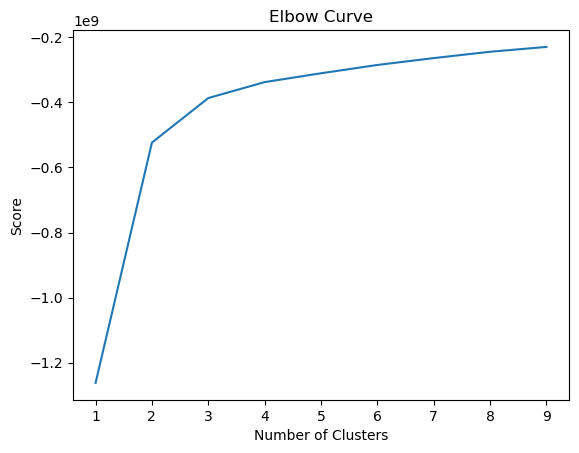

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. K-Means Clustering

As we can see on the chart above, the breaking point or elbow is only in numbers two and three, and after that, the curve tends not to change. Therefore, the optimal count of the cluster is three. 

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

KMeans(n_clusters=3)

In [17]:
df_2['clusters'] = kmeans.fit_predict(df_2)

In [18]:
df_2.head()

,world_rank,national_rank,education_quality_rank,alumni_employment_rank,Faculty_quality_rank,publications_rank,influence_rank,citations,broad_impact_rank,patents_rank,score,year,the_best_world_rank,clusters
0,1,1,7,9,1,1,1,1,496,5,100,2012,1,1
1,2,2,9,17,3,12,4,4,496,1,91,2012,1,1
2,3,3,17,11,5,4,2,2,496,15,89,2012,1,1
3,4,1,10,24,4,16,16,11,496,50,86,2012,3,1
4,5,4,2,29,7,37,22,22,496,18,85,2012,1,1


In [19]:
df_2['clusters'].value_counts()

0    800
1    734
2    666
Name: clusters, dtype: int64

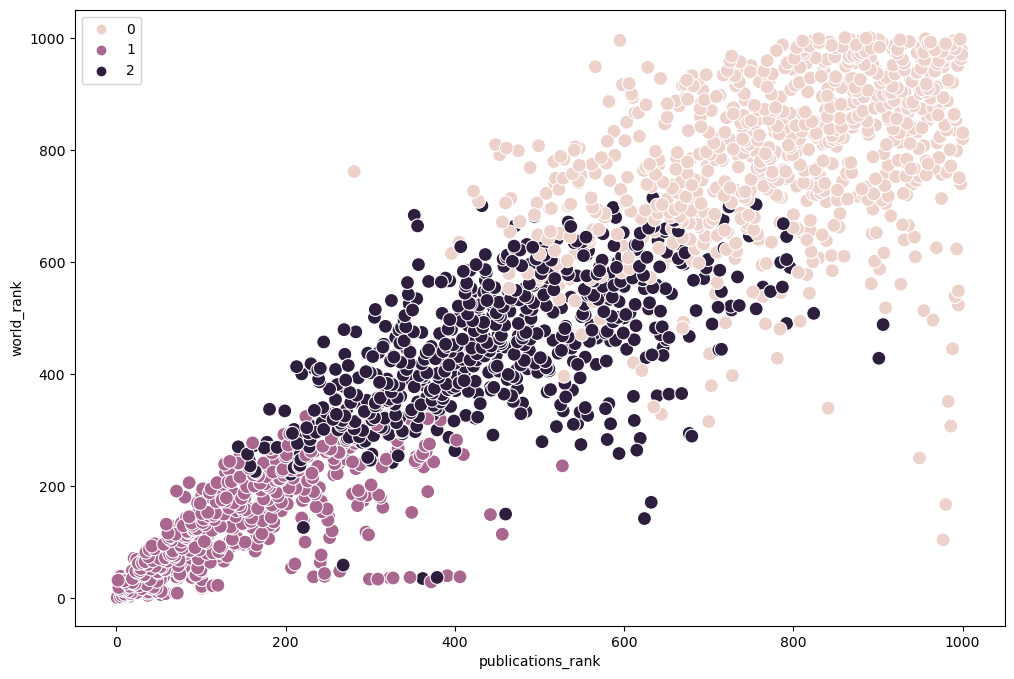

In [20]:
# Plot the clusters for the 'publication_rank' and 'world_rank' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['publications_rank'], y=df_2['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('publications_rank')
plt.ylabel('world_rank')
plt.show()

### Discussion: 
As we can see above, a strong relationship exists between the world rank and the publication rank variables, which means the more publications published by a university, the better its world rank. The first cluster (cluster code = 0) represents the universities with the highest world rank and also gets the highest publications rank. However, some cluster '1' is included in the best world rank but needs more publications.  

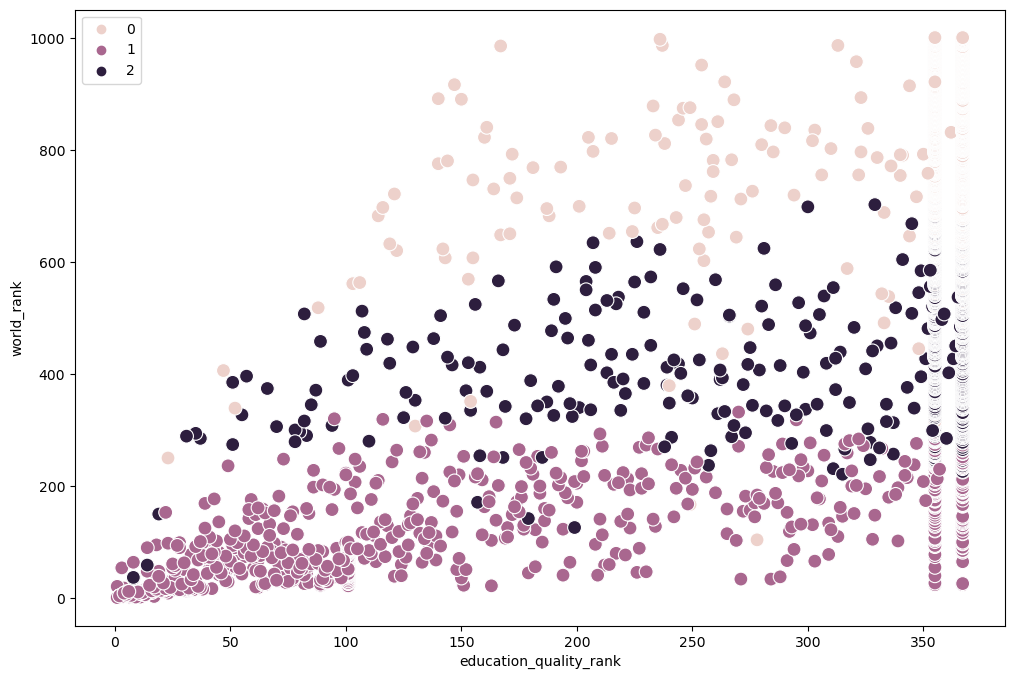

In [21]:
# Plot the clusters for the 'education_quality_rank' and 'world_rank' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['education_quality_rank'], y=df_2['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('education_quality_rank')
plt.ylabel('world_rank')
plt.show()

### Discussion
As we can see above, although some universities have the best world rank, they still need better education quality. This condition is evenly distributed throughout the cluster. 

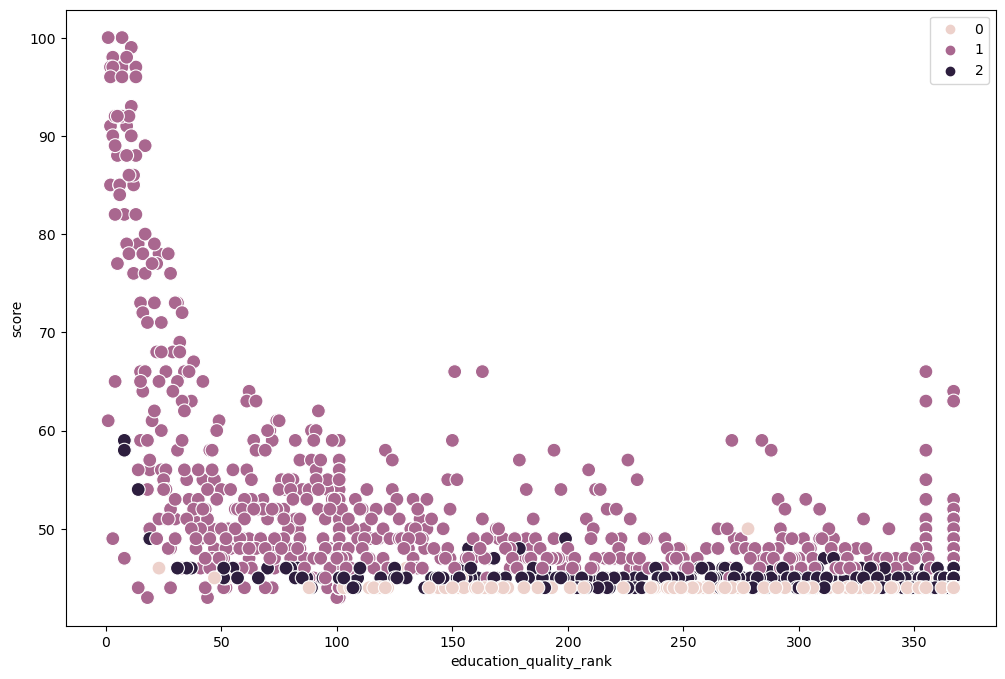

In [22]:
# Plot the clusters for the 'education_quality_rank' and 'score' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['education_quality_rank'], y=df_2['score'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('education_quality_rank')
plt.ylabel('score')
plt.show()

### Discussion
From the chart above, we can see that score and the quality of education have a fair correlation. The population of cluster 0, with an education quality rank of less than 50, has a better score than the other proportion of the population. However, the education quality rank of more than 50 has a lower score, though better than other clusters.  

In [23]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
df_2.groupby('cluster').agg({'world_rank':['mean', 'median'], 
                         'publications_rank':['mean', 'median'], 
                         'education_quality_rank':['mean', 'median'],
                          'score':['mean', 'median']})

world_rank        publications_rank         \
                   mean median              mean median   
cluster                                                   
dark purple  444.576577  442.0        445.357357  435.0   
pink         788.500000  800.5        782.415000  799.0   
purple       114.730245   93.0        121.606267  101.0   

            education_quality_rank             score         
                              mean median       mean median  
cluster                                                      
dark purple             321.908408  355.0  44.851351   45.0  
pink                    343.576250  355.0  44.043750   44.0  
purple                  157.995913  101.0  53.185286   49.0

### Discussion 
    1. The pink cluster (code = 0) is the best stats in almost all categories. This cluster has the lowest mean and median on all ranks and the highest mean and median in the score variable. 
    2. The mean and median of the score are pretty low in all clusters (no more than 50)
    3. The median between the purple and dark purple clusters on the education quality rank is similar, although it is different on other variables. It indicates that the distribution of the quality of education is unique to others and can be a good insight for further analysis.

In [25]:
# Export data to pkl
df.to_pickle(os.path.join(path, 'Prepared Data', 'world_university_rankings_cleaned_wrangled2.pkl'))

In [26]:
# Export data to csv
df.to_csv(os.path.join(path, 'Prepared Data', 'world_university_rankings_cleaned_wrangled2.csv'))

In [27]:
# Export data to csv
df_2.to_csv(os.path.join(path, 'Prepared Data', 'world_university_rankings_cleaned_wrangled3.csv'))